In [153]:
import matplotlib as mpl
mpl.font_manager.get_fontconfig_fonts()
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
# matplotlib.rcParams.update({'font.size': 22})

font1 = {'family': 'Times New Roman', 'color':  'black', 'size': 12, 'weight' : 'bold'}


In [234]:
CO = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_CO.csv')
CO['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')


# For All time processing

In [235]:
def auto(df):
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour

    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    return df

In [236]:
# plt.figure(figsize=(20,5))
# CO_non.plot(marker='o')
CO = auto(CO)
NO2 = auto(NO2)
PM10 = auto(PM10)
PM25 = auto(PM25)

In [237]:
CO = CO.mul(1000)
NO2 = NO2.mul(1000)

# CO all time

Text(0.5, 1.0, 'CO')

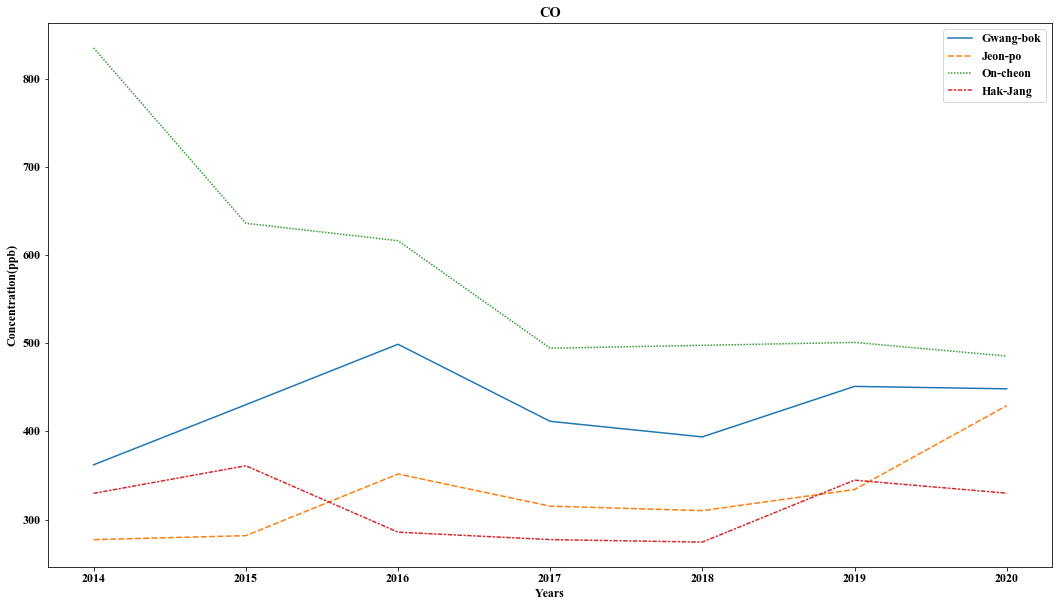

In [154]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=CO, ax = ax1, ci=None)
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.title('CO')


# NO2 all time

Text(0.5, 1.0, 'NO2')

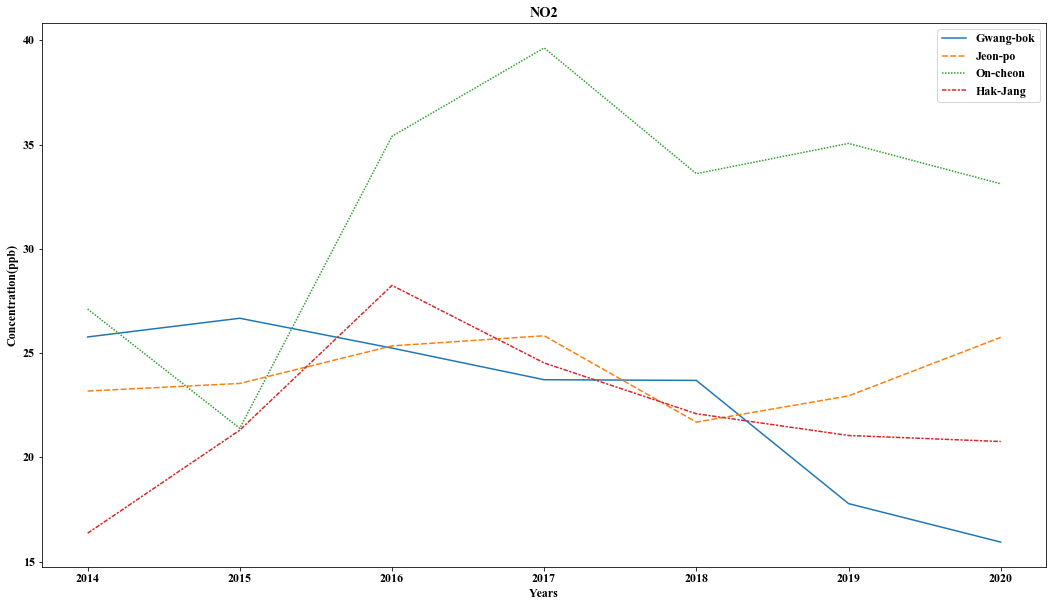

In [155]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=NO2, ax = ax1, ci=None)
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.title('NO2')


# PM10 all time

Text(0.5, 1.0, 'PM10')

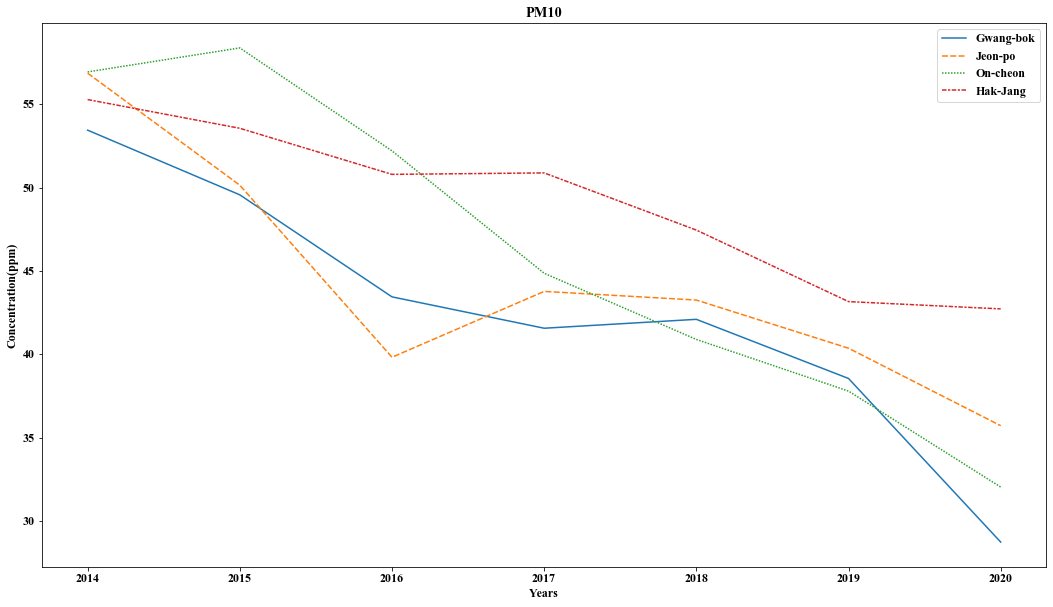

In [160]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=PM10, ax = ax1, ci=None)
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.title('PM10')


# PM2.5

Text(0.5, 1.0, 'PM2.5')

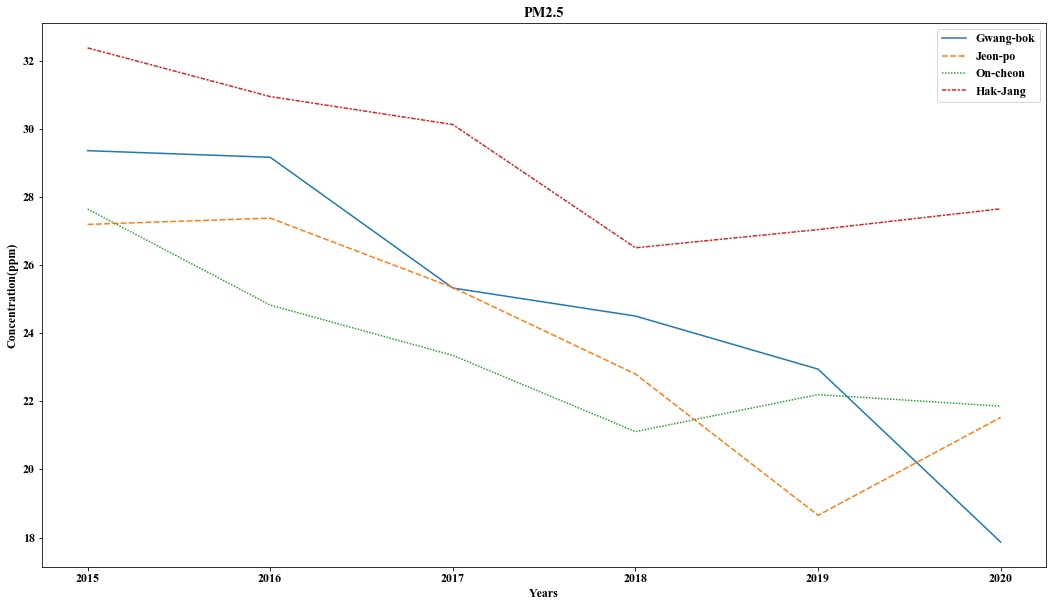

In [159]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=PM25, ax = ax1, ci=None)
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.title('PM2.5')


# Time dividing
- Non operation time
- Operation time

In [355]:
CO = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_CO.csv')
CO['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')


In [356]:
def non(df):
    
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    non= (df['time-hour']>=0) & (df['time-hour']<5)
    df = df.loc[non]    
    
    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    df['NON']=df.mean(axis=1)
    df = df['NON']

#     df = df['NON']

    
    return df


def op(df):
    
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    op= (df['time-hour']<=23) & (df['time-hour']>=5)
    df = df.loc[op]    
    
    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    df['OP']=df.mean(axis=1)

    df = df['OP']

    return df

In [357]:
op_CO = op(CO)
non_CO = non(CO)
non_CO = non_CO.mul(1000)
op_CO = op_CO.mul(1000)

op_NO2 = op(NO2)
non_NO2 = non(NO2)
non_NO2 = non_NO2.mul(1000)
op_NO2 = op_NO2.mul(1000)

op_PM10 = op(PM10)
non_PM10 = non(PM10)

op_PM25 = op(PM25)
non_PM25 = non(PM25)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Text(0.5, 1.0, 'op_CO')

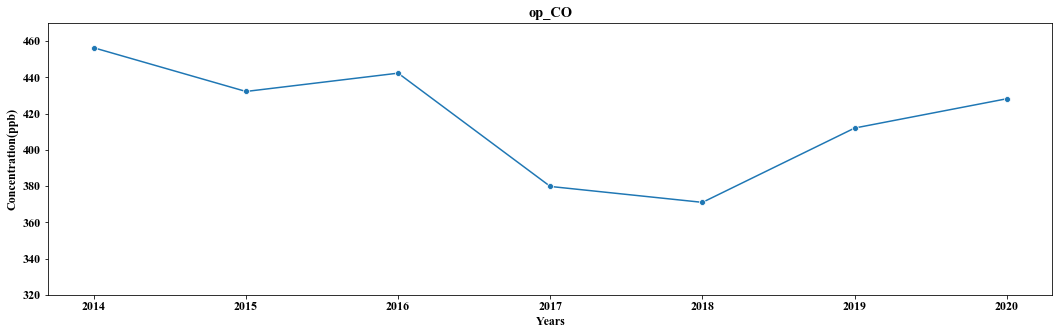

In [427]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=op_CO, ax = ax1, ci=None, marker = 'o')
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.ylim(320,470)
plt.title('op_CO')

Text(0.5, 1.0, 'non_CO')

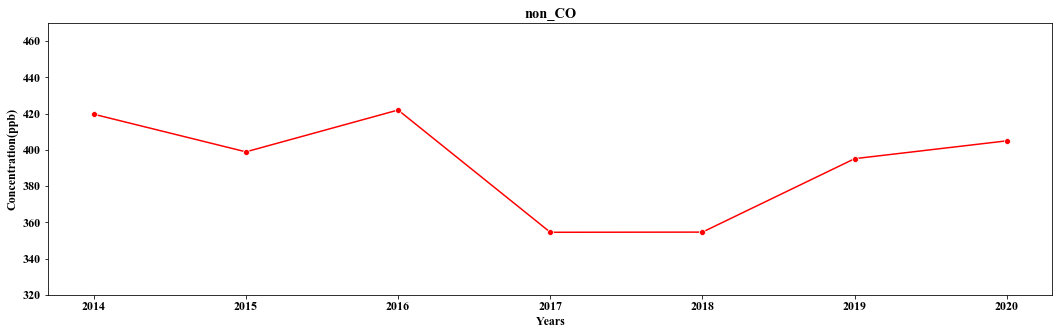

In [426]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=non_CO, ax = ax1, ci=None, marker = 'o',color='r')
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.ylim(320,470)
plt.title('non_CO')

Text(0.5, 1.0, 'op_NO2')

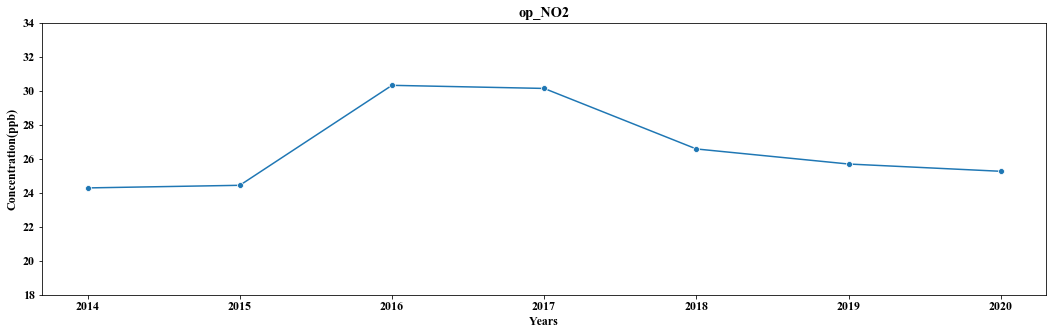

In [428]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=op_NO2, ax = ax1, ci=None, marker = 'o')
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.ylim(18,34)
plt.title('op_NO2')

Text(0.5, 1.0, 'non_NO2')

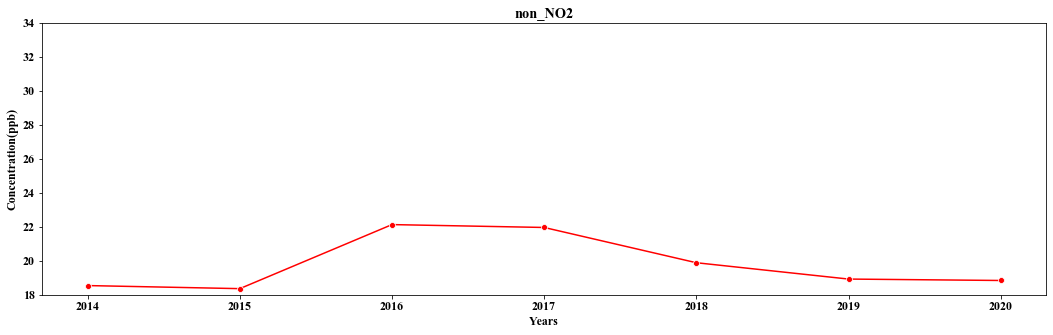

In [429]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=non_NO2, ax = ax1, ci=None, marker = 'o',color='r')
plt.ylabel('Concentration(ppb)')
plt.xlabel('Years')
plt.ylim(18,34)
plt.title('non_NO2')

Text(0.5, 1.0, 'op_PM10')

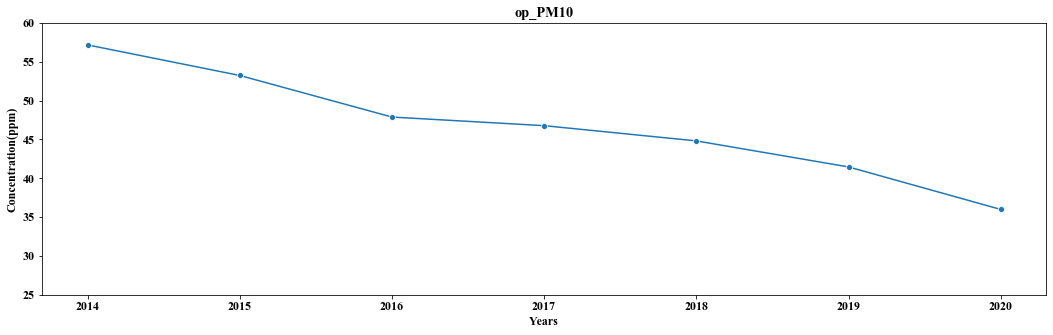

In [434]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=op_PM10, ax = ax1, ci=None, marker = 'o')
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.ylim(25,60)
plt.title('op_PM10')

# sns.lineplot(data=non_NO2, ax = ax2, ci=None, marker = 'o')
# plt.ylabel('Concentration(ppm)')
# plt.xlabel('Years')
# plt.ylim(18,35)
# plt.title('non_CO')

Text(0.5, 1.0, 'non_PM10')

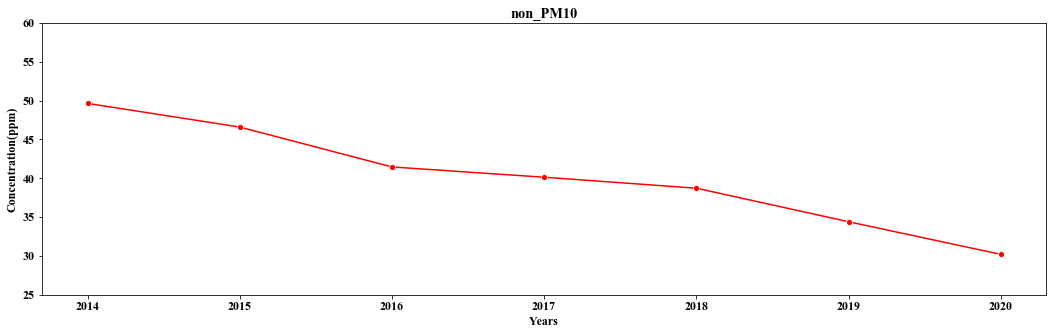

In [433]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=non_PM10, ax = ax1, ci=None, marker = 'o',color='r')
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.ylim(25,60)
plt.title('non_PM10')

Text(0.5, 1.0, 'op_PM25')

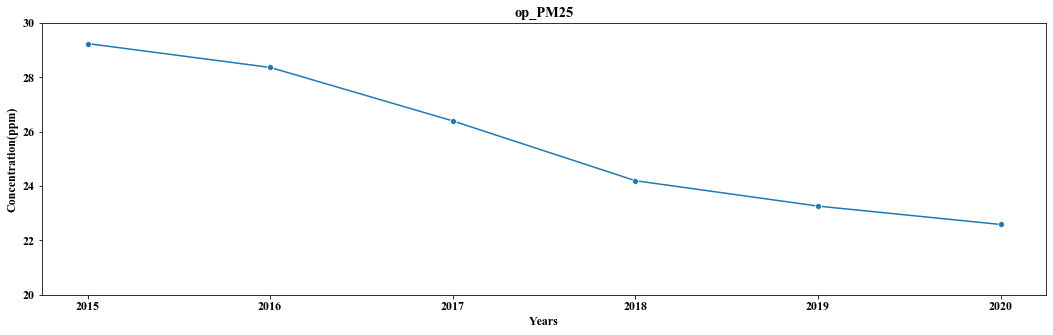

In [412]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=op_PM25, ax = ax1, ci=None, marker = 'o')
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.ylim(20,30)
plt.title('op_PM25')

Text(0.5, 1.0, 'non_PM25')

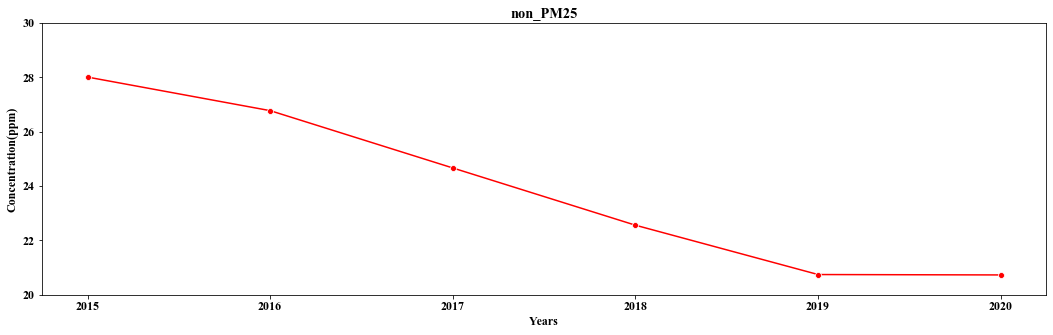

In [435]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sns.lineplot(data=non_PM25, ax = ax1, ci=None, marker = 'o',color='r')
plt.ylabel('Concentration(ppm)')
plt.xlabel('Years')
plt.ylim(20,30)
plt.title('non_PM25')

In [443]:
CO = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_CO.csv')
CO['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

def alltime(df):
    
    df["time-year"] = df["time"].dt.year
#     df["time-month"] = df["time"].dt.month
#     df["time-day"] = df["time"].dt.day
#     df["time-hour"] = df["time"].dt.hour
    
#     non= (df['time-hour']>=0) & (df['time-hour']<5)
#     df = df.loc[non]    
    
    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    
    df['mean']=df.mean(axis=1)
#     df = df['mean']

#     df = df['NON']

    
    return df


# def op(df):
    
#     df["time-year"] = df["time"].dt.year
#     df["time-month"] = df["time"].dt.month
#     df["time-day"] = df["time"].dt.day
#     df["time-hour"] = df["time"].dt.hour
    
#     op= (df['time-hour']<=23) & (df['time-hour']>=5)
#     df = df.loc[op]    
    
#     df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
#     df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
#     df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
#     df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

#     df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
#     df.set_index('time-year', inplace = True)
    
#     df['OP']=df.mean(axis=1)

#     df = df['OP']

#     return df

In [444]:
CO = alltime(CO)
CO

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Gwang-bok,Jeon-po,On-cheon,Hak-Jang,mean
time-year,,,,,
2014,0.6,0.4,1.1,0.4,0.625
2014,0.6,0.4,0.9,0.4,0.575
2014,0.5,0.4,0.8,0.4,0.525
2014,0.5,0.4,0.8,0.4,0.525
2014,0.5,0.4,0.8,0.4,0.525
...,...,...,...,...,...
2020,0.5,0.5,0.5,0.4,0.475
2020,0.5,0.5,0.5,0.4,0.475
2020,0.5,0.4,0.5,0.4,0.450


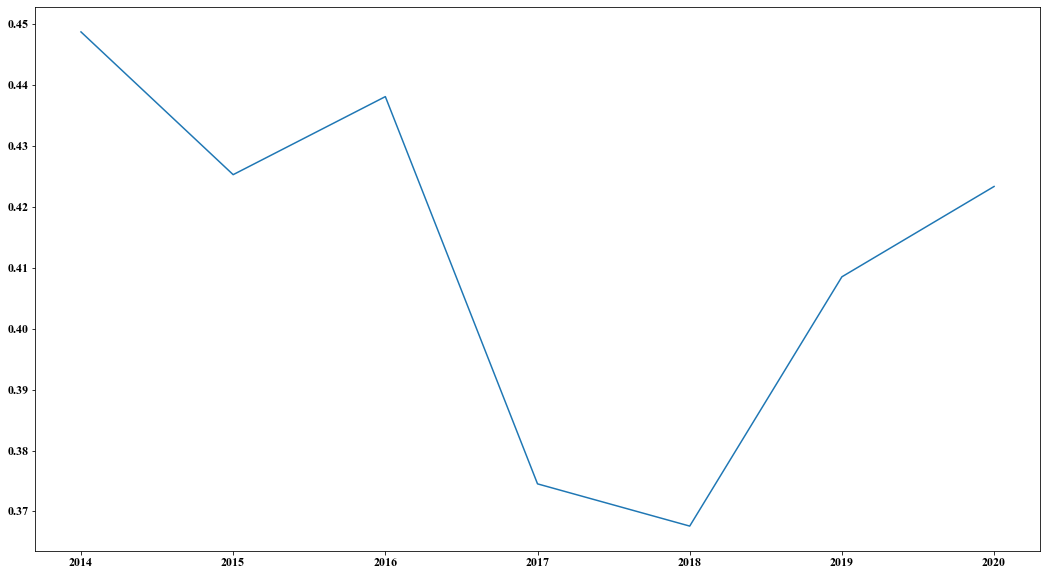

In [446]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=CO['mean'], ax = ax1, ci=None)

# 함수화

In [346]:
CO = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_CO.csv')
CO['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')


In [347]:
def non(df):
    
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    non= (df['time-hour']>=0) & (df['time-hour']<5)
    df = df.loc[non]    
    
    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year','time-hour']]
    
#     df['NON']=df.mean(axis=1)
#     df = df['NON']

#     df = df['NON']

    
    return df


def op(df):
    
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    op= (df['time-hour']<=23) & (df['time-hour']>=5)
    df = df.loc[op]    
    
    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year','time-hour']]    
    
#     df['OP']=df.mean(axis=1)
#     df = df['OP']

    return df

In [349]:
CO_op = op(CO)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [350]:
CO_op['time-year']=2014

,Gwang-bok,Jeon-po,On-cheon,Hak-Jang,time-year,time-hour
4,0.5,0.4,0.8,0.4,2014,5
5,0.5,0.4,0.7,0.4,2014,6
6,0.5,0.4,0.6,0.4,2014,7
7,0.5,0.4,0.5,0.4,2014,8
8,0.6,0.4,0.6,0.5,2014,9
...,...,...,...,...,...,...
53322,0.5,0.4,0.5,0.4,2020,19
53323,0.5,0.5,0.5,0.4,2020,20
53324,0.5,0.5,0.5,0.4,2020,21
53325,0.5,0.4,0.5,0.4,2020,22


In [104]:
NO2 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_NO2.csv')
NO2['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')
NO2

,년,월,일,시,Gwang-bok,On-cheon,Jeon-po,Hak-Jang,time
0,2014,1,1,1,0.023,0.015,0.016,0.015,2014-01-01 01:00:00
1,2014,1,1,2,0.023,0.014,0.015,0.015,2014-01-01 02:00:00
2,2014,1,1,3,0.017,0.012,0.016,0.008,2014-01-01 03:00:00
3,2014,1,1,4,0.018,0.012,0.016,0.008,2014-01-01 04:00:00
4,2014,1,1,5,0.019,0.011,0.017,0.013,2014-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
53323,2020,1,31,20,0.032,0.04,0.048,0.068,2020-01-31 20:00:00
53324,2020,1,31,21,0.033,0.034,0.046,0.03,2020-01-31 21:00:00
53325,2020,1,31,22,0.033,0.034,0.039,0.034,2020-01-31 22:00:00
53326,2020,1,31,23,0.03,0.038,0.041,0.033,2020-01-31 23:00:00


In [107]:
NO2 = auto(NO2)
NO2

,Gwang-bok,Jeon-po,On-cheon,Hak-Jang
time-year,,,,
2014,0.023,0.016,0.015,0.015
2014,0.023,0.015,0.014,0.015
2014,0.017,0.016,0.012,0.008
2014,0.018,0.016,0.012,0.008
2014,0.019,0.017,0.011,0.013
...,...,...,...,...
2020,0.032,0.048,0.040,0.068
2020,0.033,0.046,0.034,0.030
2020,0.033,0.039,0.034,0.034


(0, 0.05)

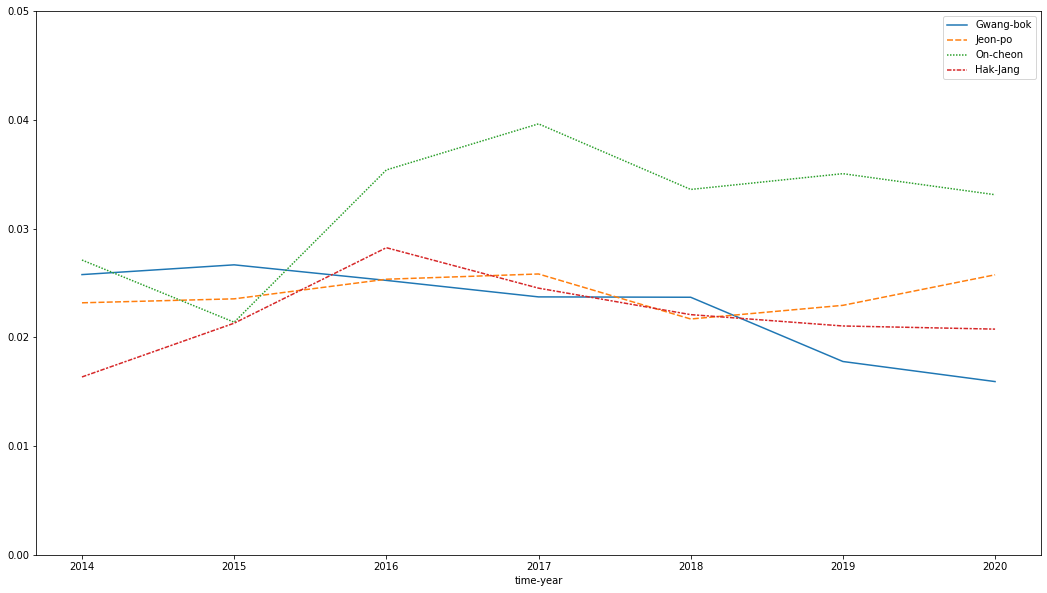

In [109]:
import seaborn as sns
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=NO2, ax = ax1, ci=None)
plt.ylim((0,0.05))

In [119]:
def auto(df):
    df["time-year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour

    df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')
    df['On-cheon'] = df['On-cheon'].apply(pd.to_numeric, errors='coerce')
    df['Jeon-po'] = df['Jeon-po'].apply(pd.to_numeric, errors='coerce')
    df['Hak-Jang'] = df['Hak-Jang'].apply(pd.to_numeric, errors='coerce')

    df = df[['Gwang-bok','Jeon-po','On-cheon','Hak-Jang','time-year']]
    df.set_index('time-year', inplace = True)
    figure, (ax1) = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(18,10)
#     sns.lineplot(data=df, ax = ax1, ci=None)
#     plt.ylim((0,0.05))
    return  sns.lineplot(data=df, ax = ax1, ci=None, marker='o')

In [120]:
PM10 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM10.csv')
PM10['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')

PM25 = pd.read_csv('C:/Users/User/Desktop/연구실/AQMS_PM25.csv')
PM25['time']=pd.date_range(start='2014-1-1-01', end='2020-2-1-00', freq = 'H')
PM25

,년,월,일,시,Gwang-bok,On-cheon,Jeon-po,Hak-Jang,time
0,2014,1,1,1,NaN,NaN,NaN,NaN,2014-01-01 01:00:00
1,2014,1,1,2,NaN,NaN,NaN,NaN,2014-01-01 02:00:00
2,2014,1,1,3,NaN,NaN,NaN,NaN,2014-01-01 03:00:00
3,2014,1,1,4,NaN,NaN,NaN,NaN,2014-01-01 04:00:00
4,2014,1,1,5,NaN,NaN,NaN,NaN,2014-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
53323,2020,1,31,20,19,26,27,27,2020-01-31 20:00:00
53324,2020,1,31,21,25,27,26,29,2020-01-31 21:00:00
53325,2020,1,31,22,23,26,25,30,2020-01-31 22:00:00
53326,2020,1,31,23,19,26,23,31,2020-01-31 23:00:00


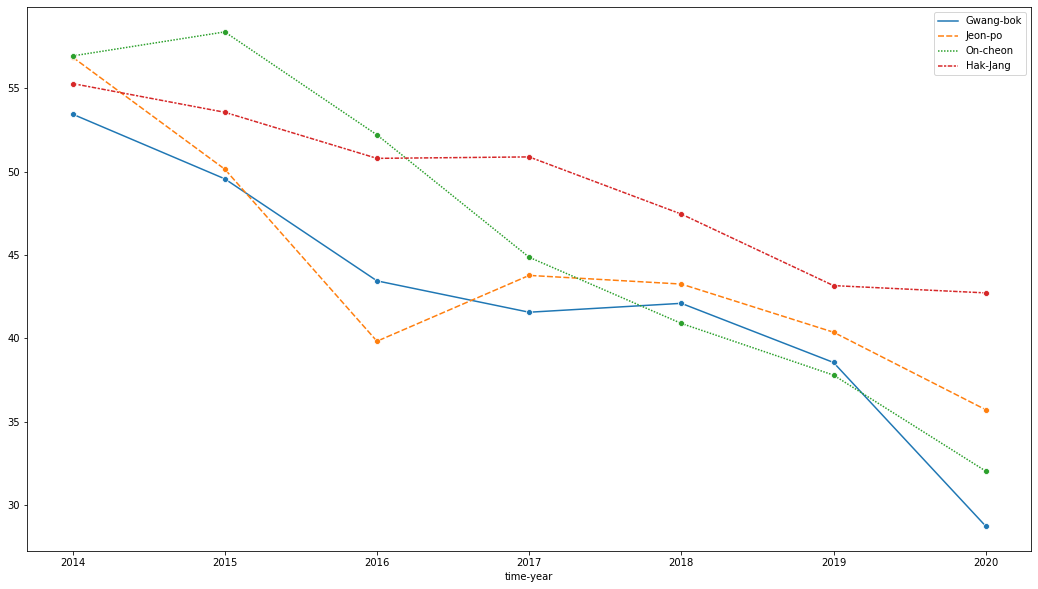

In [121]:
auto(PM10)

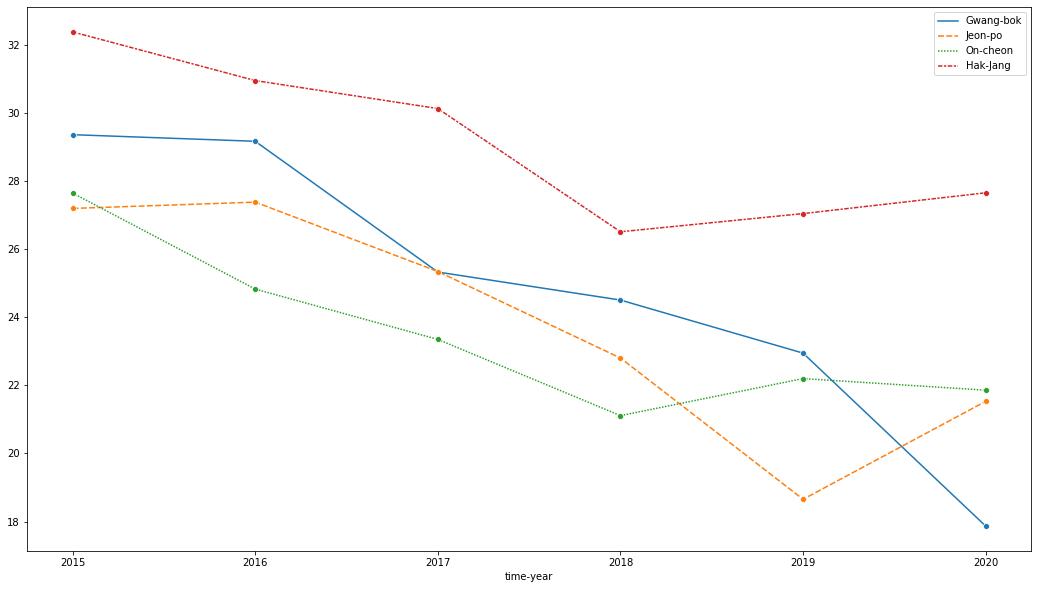

In [122]:
auto(PM25)

In [366]:
dic = {
    'a': 1,
    'b': 4,
    'c':3,
    'd':2
}

In [371]:
dic2 =sorted(dic.values())
dic2

[1, 2, 3, 4]

In [376]:
dic3 = [2,6,3,4]


In [377]:
dic3.sort()

In [378]:
dic3

[2, 3, 4, 6]